# Описание и пример реализации простейшего градиентного спуска

## Описание технологии градиентного спуска.

Задачи классификации и регрессии сводят к нахождению минимума функции потерь, описывающей гиперплоскость раздела классов или с минимальной ошибкой предсказывающую значение целевой переменной (таргета).
Для нахождения экстремума (минимума) функции потерь значение её производной приравнивают к нолю. И для поиска значений аргументов и целевой перменной используют <b>метод градиетного спуска</b>.
Он сводится следующему:
1. Инициализируются значения переменных случайными значениями.
2. Вычисляются значения частных производных с текущими значениями переменных.
3. Вычисляются уточненные значения переменных за счет вычитания из значений аргументов предыдущего шага значений частных производных в этой точке, умноженных на шаг обучения.
4. Сравниваются значения функции потерь в старой и новой точке. Если разница больше критерия остановки алгоритма, то алгоритм продолжается с пункта 2. Если разница меньше - получаем значения аргументов и значение самой лосс функции в точке её локального минимума.

Для работы алгоритма лосс функция должна быть дифференцируема на всем интервале значений.

Стохастический градиентный спуск отличается от градиентного тем, что градиент на каждом шаге считается не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента. Сейчас выборки не рассматриваем, стохастический градиентный спуск не реализуем.

## Простейшая реализация алгоритма градиентного спуска на функции одной переменной.

In [1]:
# Имортируем библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np

#### Градиентный спуск функции одной переменной

Задаём функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$f(x) = x^2 + 3$$

In [2]:
def loss(x):
    return x * x + 3

Задаём функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [3]:
def derivative(x):
    return 2 * x

3. Задай функцию `step` - она будет возвращать новое значение параметра по формуле:
$$x_{i+1} = x_i - \alpha \frac{\partial f(x)}{\partial x_i}$$

Входные аргументы: `x` - текущее значение параметра, `alpha` – скорость спуска. 

In [4]:
def step(x, alpha):
    coord = x - alpha * derivative(x)
    loss_value = loss(coord)
    '''
    input:
        alpha - learning rate
    
    returns: 
        coord - x_coord
        f     - y_coord
    '''
    
    return coord, loss_value

Задаем функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `x`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `x`. На вход функции поступает `x_0` – начальное значение параметра, `eps` – критерий останова. `alpha` - скорость спуска, которая будет передаваться в функцию `step`

In [5]:
def get_minima(x_0, eps, alpha): 
    x = []
    loss_values = []
    x.append(x_0)
    loss_0 = loss(x_0)
    loss_values.append(loss_0)
    x_i, loss_i = step(x_0, alpha)
    x.append(x_i)
    loss_values.append(loss_i)
    while abs(loss_i - loss_0) > eps:
        x_0, loss_0 = x_i, loss_i
        x_i, loss_i = step(x_0, alpha)
        # x_i, loss_i = step(x_0, alpha)
        x.append(x_i)
        loss_values.append(loss_i)
    return x, loss_values

Нарисуем график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуем график движения градиентного спуска. 

In [6]:
x, y = get_minima(50, 0.01, 0.01)
a, b = get_minima(50, 0.01, 0.2)

Нарисуем несколько графиков, соответствующих разным коэффициентам $\alpha$. 

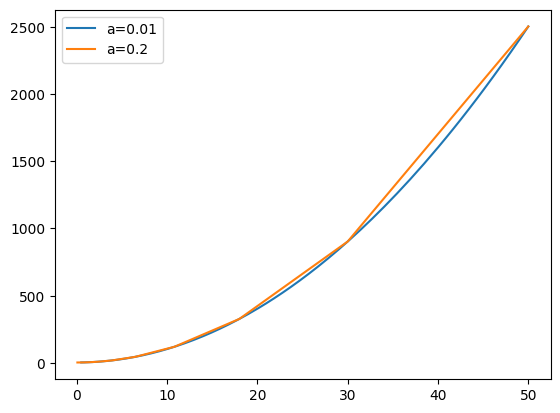

In [7]:
import matplotlib.pyplot as plt

plt.plot(x, y, label = "a=0.01")
plt.plot(a, b, label = "a=0.2")
plt.legend();

Повторим поиск минимума для более сложной функции: 
$$f(x) = x^2 - x$$

In [22]:
def loss(x):
    return x * x - x

def derivative(x):
    return 2 * x - 1

x, y = get_minima(40, 0.01, 0.01)
a, b = get_minima(40, 0.01, 0.2)

k = np.linspace(0, 50, 10000)
l = np.array(k * k - k)

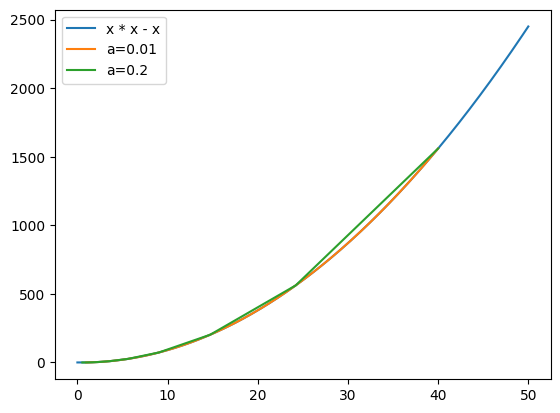

In [24]:
plt.plot(k, l, label = "x * x - x")
plt.plot(x, y, label = "a=0.01")
plt.plot(a, b, label = "a=0.2")
plt.legend();

#### Градиентный спуск для функции двух переменных

1. Реализуем поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} = x_1^2 + 2x_2^2 - 3x_1 - 4x_2$$

In [12]:
def loss2(x1, x2):
    return x1 * x1 + 2 * x2 * x2 - 3 * x1 - 4 * x2

In [13]:
# для частных производных правила взятия применяются только для текущей перменной, остальные переменные принимаются равными константе и сокращаются
def derivative2(x1, x2):
    deriv1 = 2 * x1 - 3
    deriv2 = 4 * x2 - 4
    return deriv1, deriv2

In [14]:
# Шаг делается для двух переменных сразу. На вход функция получает текущие значения аргументов, а возвращает новые значения аргументов и новое значение лосс функции.
def step2(x1_0, x2_0, alpha):
    x1_n = x1_0 - alpha * derivative2(x1_0, x2_0)[0]
    x2_n = x2_0 - alpha * derivative2(x1_0, x2_0)[1]
    loss_value = loss2(x1_n, x2_n)
    return x1_n, x2_n, loss_value

In [15]:
# Функция получает на вход текущие значения аргументов, критерий остановки и шаг обучения. Возвращает значения аргументов и функции потерь в точке локального минимума.
def get_minima_2x(x1_0, x2_0, eps, alpha): 
    x1 = []
    x2 = []
    loss_values = []
    x1.append(x1_0)
    x2.append(x2_0)
    loss_0 = loss2(x1_0, x2_0)
    loss_values.append(loss_0)
    x1_i, x2_i, loss_i = step2(x1_0, x2_0, alpha)
    x1.append(x1_i)
    x2.append(x2_i)
    loss_values.append(loss_i)
    while abs(loss_i - loss_0) > eps:
        x1_0, x2_0, loss_0 = x1_i, x2_i, loss_i
        x1_i, x2_i, loss_i = step2(x1_0, x2_0, alpha)
        x1.append(x1_i)
        x2.append(x2_i)
        loss_values.append(loss_i)
    return x1, x2, loss_values

In [16]:
x1, x2, y = get_minima_2x(3, 3, 0.00001, 0.01)
x1[-1], x2[-1]

(1.515290104065201, 1.0001890601053876)

In [17]:
a1, a2, b = get_minima_2x(5, 5, 0.01, 0.2)

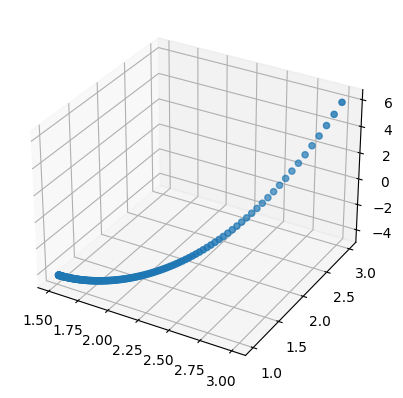

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y,);

In [25]:
def get_plot_two_variables(x1, x2, n=10):

    x1_, x2_ = np.meshgrid(x1, x2)
    z = loss2(x1_, x2_)
    contours = plt.contour(x1_, x2_, z)
    plt.clabel(contours, inline = True)

    plt.plot(x1, x2, color='purple')
    plt.scatter(x1, x2, color='midnightblue')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Градиентный спуск двух переменных')
    plt.colorbar()
    plt.show()

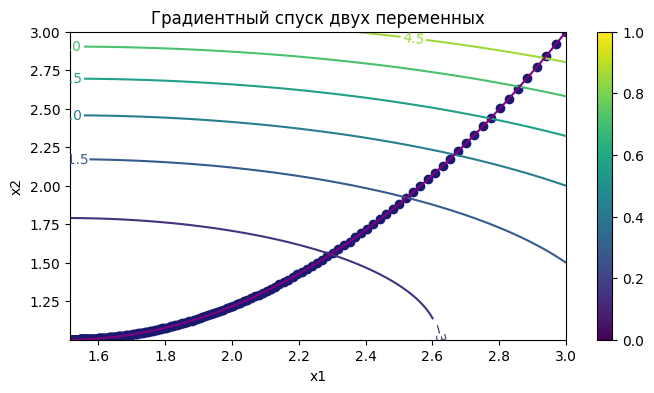

In [28]:
plt.figure(figsize=(8, 4))
get_plot_two_variables(x1, x2)

In [ ]:
# code

То же самое для другой функции: 
$$f(x, y) = (5x)^2 + y^2$$

In [ ]:
def loss2(x1, x2):
    return 25 * x1 * x1 + x2 * x2

In [29]:
def derivative2(x1, x2):
    deriv1 = 50 * x1
    deriv2 = 2 * x2
    return deriv1, deriv2

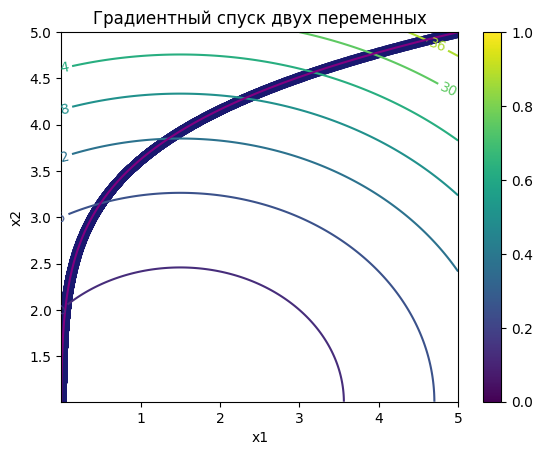

In [35]:
x1, x2, y = get_minima_2x(5, 5, 0.000001, 0.0001)
get_plot_two_variables(x1, x2)